**Table of contents**<a id='toc0_'></a>    
- [Importing Libraries](#toc1_)    
- [Configuring Visualization Parameters](#toc2_)    
- [Configuring Other Notebook Parameters](#toc3_)    
- [Pre-installing Custom Functions](#toc4_)    
- [Practicing in Stages](#toc5_)    
  - [DICOM in Python](#toc5_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Importing Libraries](#toc0_)


In [1]:
# Import PyDicom before using PyDicom functions

# DICOM (Digital Imaging and Communications in Medicine) is the standard protocol for 
# the management and transmission of medical images and related data, and is used by 
# many healthcare facilities

# PyDicom is a pure Python package for working with DICOM files
import pydicom

In [2]:
# The `pathlib` module is similar to the `os.path` module, but `pathlib` provides a more 
# advanced and convenient interface than `os.path`

# It is possible to use `pathlib` to represent file paths as specialized `Path` objects 
# instead of plain strings
from pathlib import Path

In [3]:
import numpy as np

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [5]:
import random
import reprlib
import sys

# <a id='toc2_'></a>[Configuring Visualization Parameters](#toc0_)


In [6]:
%matplotlib inline

In [7]:
XINHUI = "#7a7374"
XUEBAI = "#fffef9"
YINBAI = "#f1f0ed"
YINHUI = "#918072"

figure_size = (16, 9)

In [8]:
custom_params = {
    "axes.axisbelow": True,
    "axes.edgecolor": YINBAI,
    "axes.facecolor": XUEBAI,
    "axes.grid": True,
    "axes.labelcolor": XINHUI,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.titlecolor": XINHUI,
    "figure.edgecolor": YINBAI,
    "figure.facecolor": XUEBAI,
    "grid.alpha": 0.8,
    "grid.color": YINBAI,
    "grid.linestyle": "--",
    "grid.linewidth": 1.2,
    "legend.edgecolor": YINHUI,
    "patch.edgecolor": XUEBAI,
    "patch.force_edgecolor": True,
    "text.color": XINHUI,
    "xtick.color": YINHUI,
    "ytick.color": YINHUI,
}

mpl.rcParams.update(custom_params)

# <a id='toc3_'></a>[Configuring Other Notebook Parameters](#toc0_)


In [9]:
reprlib_rules = reprlib.Repr()
reprlib_rules.maxother = 250

# <a id='toc4_'></a>[Pre-installing Custom Functions](#toc0_)


In [10]:
sys.path.append("../")

In [11]:
from Modules import *

# <a id='toc5_'></a>[Practicing in Stages](#toc0_)

## <a id='toc5_1_'></a>[DICOM in Python](#toc0_)


In [12]:
dir_path = "../Datasets/Kaggle - CT Medical Images/dicom_dir/"
sample_dcm = "ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
dicom_file = pydicom.read_file(dir_path + sample_dcm)
ct = dicom_file.pixel_array

tabulation = Form_Generator()
tabulation.heading_printer("")

statements = [
    """
dir_path = "../Datasets/Kaggle - CT Medical Images/dicom_dir/"
sample_dcm = "ID_0000_AGE_0060_CONTRAST_1_CT.dcm"
dicom_file = pydicom.read_file(dir_path + sample_dcm)
ct = dicom_file.pixel_array
"""
]
tabulation.statement_generator(statements)

variables = ["dicom_file", "ct"]
values = [str(reprlib_rules.repr(dicom_file)), str(reprlib_rules.repr(ct))]
tabulation.variable_generator(variables, values)

expressions = [
    "dicom_file[0x0028, 0x0010]",
    "dicom_file[0x0028, 0x0011]",
    "dicom_file[0x0018, 0x0015]",
    "dicom_file.Rows",
    "dicom_file.Columns",
    "dicom_file.BodyPartExamined",
    "dicom_file.keys()",
    "dicom_file.values()",
    "dicom_file.dir()",
    'dicom_file.dir("Image")',
    "ct.shape",
]
results = [
    str(dicom_file[0x0028, 0x0010]),
    str(dicom_file[0x0028, 0x0011]),
    str(dicom_file[0x0018, 0x0015]),
    str(dicom_file.Rows),
    str(dicom_file.Columns),
    str(dicom_file.BodyPartExamined),
    str(reprlib_rules.repr(dicom_file.keys())),
    str(reprlib_rules.repr(dicom_file.values())),
    str(reprlib_rules.repr(dicom_file.dir())),
    str(reprlib_rules.repr(dicom_file.dir("Image"))),
    str(ct.shape),
]
tabulation.expression_generator(expressions, results, 1)



    +-------------------------------------------------------+
    | Statement                                             |
    +-------------------------------------------------------+
    | dir_path = "../Datasets/Kaggle - CT Medical           |
    |     Images/dicom_dir/"                                |
    | sample_dcm = "ID_0000_AGE_0060_CONTRAST_1_CT.dcm"     |
    | dicom_file = pydicom.read_file(dir_path + sample_dcm) |
    | ct = dicom_file.pixel_array                           |
    +-------------------------------------------------------+
    +------------+------------------------------------------------+
    | Variable   | Value                                          |
    +------------+------------------------------------------------+
    | dicom_file | Dataset.file_meta                              |
    |            |         -------------------------------        |
    |            | (0002, 0000) File Meta Information Group       |
    |            |         Lengt

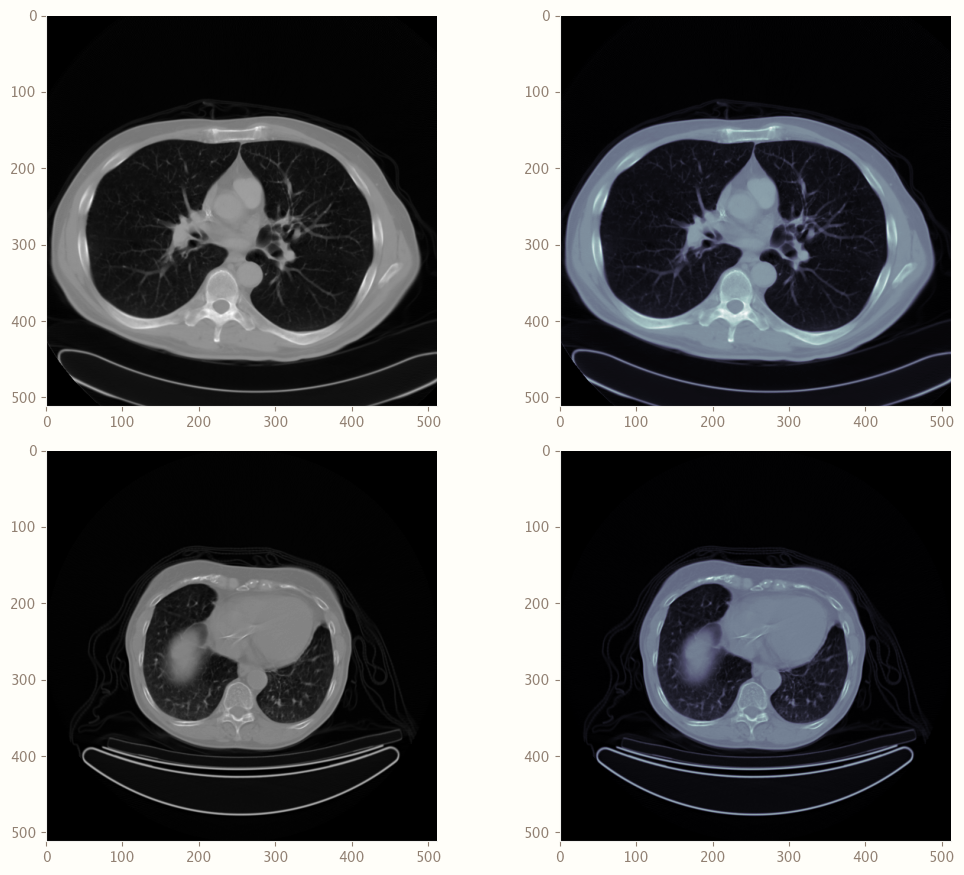

In [13]:
path = Path(dir_path)

dicom_path = random.choice([entry.name for entry in path.iterdir() if (entry.is_file() and entry.name != sample_dcm)])

dicom_file = pydicom.read_file(dir_path + dicom_path)


def image_display(image, ax, title, cmap):
    # Data can be displayed as an image using `imshow`, but only on a 2D regular raster,
    # so it needs to be reshaped into a 2D array
    ax.imshow(image, cmap)
    ax.grid(False)
    ax.set_title(title, loc="center", pad=10)
    # ticks = list(range(0, 28, 10))
    # ax.set(xticks=ticks, xticklabels=ticks, yticks=ticks, yticklabels=ticks)
    ax.set_xlim(left=0)
    ax.set_ylim(top=0)
    # ax.minorticks_on()
    return ax





def anatomical_orientation_markers(dicom_file, ax, cmap):
    cmap_color = mpl.colormaps[cmap]
    rgba_color = cmap_color(0.9)
    return rgba_color



def DICOM_image_display(dicom_file, ax, title, cmap):
    # Data can be displayed as an image using `imshow`, but only on a 2D regular raster,
    # so it needs to be reshaped into a 2D array
    ax.imshow(dicom_file.pixel_array, cmap)
    ax.grid(False)
    ax.set_title(title, loc="center", pad=10)
    # ticks = list(range(0, 28, 10))
    # ax.set(xticks=ticks, xticklabels=ticks, yticks=ticks, yticklabels=ticks)
    ax.set_xlim(left=0)
    ax.set_ylim(top=0)
    # ax.minorticks_on()
    return ax


plt.rcParams["figure.figsize"] = (figure_size[0] / 3 * 2, figure_size[1])

# random_selector = np.random.choice(range(len(train_data)), 4)

fig, axs = plt.subplots(nrows=2, ncols=2)

image_display(
    ct,
    axs[0, 0],
    "",
    cmap="gray",
)

image_display(
    ct,
    axs[0, 1],
    "",
    cmap="bone",
)

DICOM_image_display(
    dicom_file,
    axs[1, 0],
    "",
    cmap="gray",
)

DICOM_image_display(
    dicom_file,
    axs[1, 1],
    "",
    cmap="bone",
)


fig.suptitle(
    "",
    fontsize="x-large",
    x=0.5,
    y=0,
)

plt.tight_layout()
plt.show()

In [14]:
dicom_file.keys()
dicom_file.values()

dict_values([RawDataElement(tag=(0008, 0000), VR=None, length=4, value=b'\xc8\x01\x00\x00', value_tell=346, is_implicit_VR=True, is_little_endian=True, is_raw=True), (0008, 0005) Specific Character Set              CS: 'ISO_IR 100', RawDataElement(tag=(0008, 0008), VR=None, length=34, value=b'ORIGINAL\\PRIMARY\\AXIAL\\CT_SOM5 SPI', value_tell=376, is_implicit_VR=True, is_little_endian=True, is_raw=True), RawDataElement(tag=(0008, 0016), VR=None, length=26, value=b'1.2.840.10008.5.1.4.1.1.2\x00', value_tell=418, is_implicit_VR=True, is_little_endian=True, is_raw=True), RawDataElement(tag=(0008, 0018), VR=None, length=64, value=b'1.3.6.1.4.1.14519.5.2.1.7777.9002.284619134936288319541284134498', value_tell=452, is_implicit_VR=True, is_little_endian=True, is_raw=True), RawDataElement(tag=(0008, 0020), VR=None, length=8, value=b'19851222', value_tell=524, is_implicit_VR=True, is_little_endian=True, is_raw=True), RawDataElement(tag=(0008, 0021), VR=None, length=8, value=b'19851222', value_t

In [15]:
res = []

# construct path object
d = Path(dir_path)

# iterate directory
for entry in d.iterdir():
    # check if it a file
    if entry.is_file():
        print(entry.name)

ID_0062_AGE_0067_CONTRAST_0_CT.dcm
ID_0072_AGE_0060_CONTRAST_0_CT.dcm
ID_0041_AGE_0045_CONTRAST_1_CT.dcm
ID_0075_AGE_0080_CONTRAST_0_CT.dcm
ID_0052_AGE_0072_CONTRAST_0_CT.dcm
ID_0028_AGE_0074_CONTRAST_1_CT.dcm
ID_0070_AGE_0074_CONTRAST_0_CT.dcm
ID_0098_AGE_0061_CONTRAST_0_CT.dcm
ID_0009_AGE_0048_CONTRAST_1_CT.dcm
ID_0065_AGE_0082_CONTRAST_0_CT.dcm
ID_0005_AGE_0048_CONTRAST_1_CT.dcm
ID_0080_AGE_0070_CONTRAST_0_CT.dcm
ID_0013_AGE_0060_CONTRAST_1_CT.dcm
ID_0086_AGE_0073_CONTRAST_0_CT.dcm
ID_0061_AGE_0074_CONTRAST_0_CT.dcm
ID_0083_AGE_0082_CONTRAST_0_CT.dcm
ID_0078_AGE_0066_CONTRAST_0_CT.dcm
ID_0077_AGE_0074_CONTRAST_0_CT.dcm
ID_0035_AGE_0059_CONTRAST_1_CT.dcm
ID_0087_AGE_0044_CONTRAST_0_CT.dcm
ID_0088_AGE_0067_CONTRAST_0_CT.dcm
ID_0084_AGE_0067_CONTRAST_0_CT.dcm
ID_0020_AGE_0066_CONTRAST_1_CT.dcm
ID_0039_AGE_0074_CONTRAST_1_CT.dcm
ID_0004_AGE_0056_CONTRAST_1_CT.dcm
ID_0059_AGE_0074_CONTRAST_0_CT.dcm
ID_0076_AGE_0068_CONTRAST_0_CT.dcm
ID_0006_AGE_0075_CONTRAST_1_CT.dcm
ID_0027_AGE_0064_CON

In [16]:
path = Path(dir_path)

dicom_path = random.choice([entry for entry in path.iterdir() if (entry.is_file() and entry.name != sample_dcm)])

dicom_path.name

'ID_0035_AGE_0059_CONTRAST_1_CT.dcm'

In [17]:
for entry in d.iterdir():
    sample_dcm = entry.name
    dicom_file = pydicom.read_file(dir_path + sample_dcm)
    if len(dicom_file.ImageType) >= 3 and dicom_file.ImageType[2] == "AXIAL":
        if dicom_file.RotationDirection == "CW":
            if dicom_file.Rows != 512 or dicom_file.Columns != 512:
                print(dicom_file.Rows)
                print(dicom_file.Columns)


In [18]:
dicom_file.dir()

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionNumber',
 'AcquisitionTime',
 'AdmittingDiagnosesDescription',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'BurnedInAnnotation',
 'Columns',
 'CompressionCode',
 'ContentDate',
 'ContentTime',
 'ContrastBolusAgent',
 'ConvolutionKernel',
 'DataSetSubtype',
 'DataSetType',
 'DeidentificationMethod',
 'DeidentificationMethodCodeSequence',
 'DistanceSourceToDetector',
 'DistanceSourceToPatient',
 'Exposure',
 'ExposureTime',
 'FilterType',
 'FocalSpots',
 'FrameOfReferenceUID',
 'GantryDetectorTilt',
 'GeneratorPower',
 'HighBit',
 'ImageDimensions',
 'ImageFormat',
 'ImageGeometryType',
 'ImageLocation',
 'ImageOrientation',
 'ImageOrientationPatient',
 'ImagePosition',
 'ImagePositionPatient',
 'ImageType',
 'InstanceNumber',
 'KVP',
 'Location',
 'LongitudinalTemporalInformationModified',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientComments',
 'PatientID',
 'PatientI

In [37]:
cmap = mpl.colormaps["bone"]
rgba = cmap(0.9)
rgba

(0.8659619615501968, 0.9142156862745098, 0.9142156669730502, 1.0)

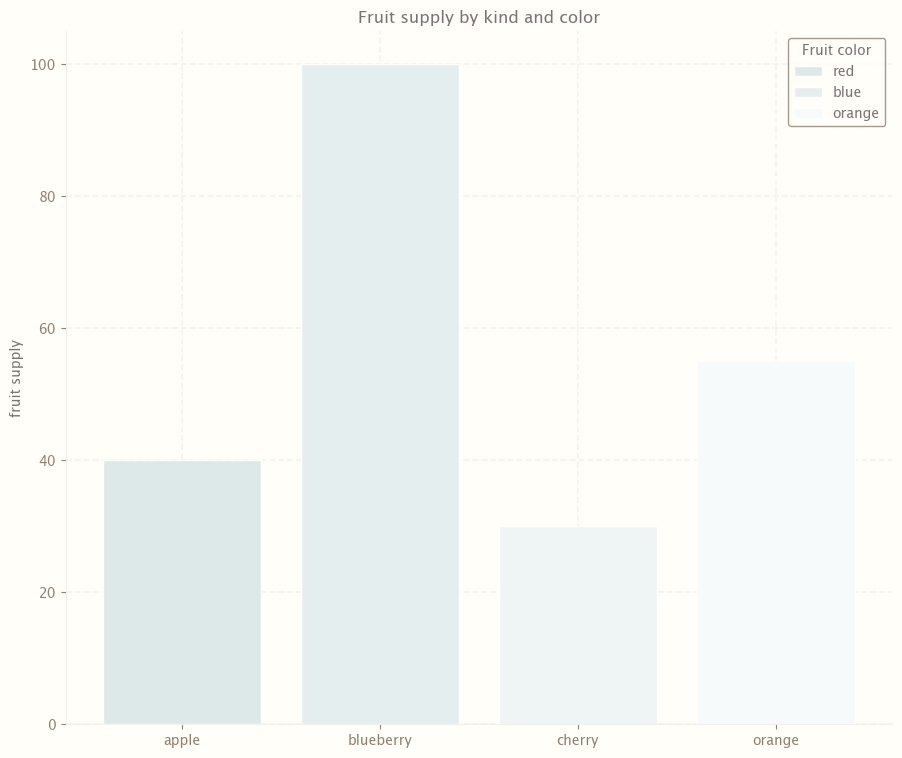

In [40]:
fig, ax = plt.subplots()

fruits = ['apple', 'blueberry', 'cherry', 'orange']
counts = [40, 100, 30, 55]
bar_labels = ['red', 'blue', '_red', 'orange']
bar_colors = [cmap(0.9), cmap(0.925), cmap(0.95), cmap(0.975)]

ax.bar(fruits, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('fruit supply')
ax.set_title('Fruit supply by kind and color')
ax.legend(title='Fruit color')

plt.show()

In [47]:
dicom_file.ImageOrientationPatient

[1, 0, 0, 0, 1, 0]

In [48]:
dicom_file.ImagePositionPatient

[-150, -307, -239]

In [49]:
dicom_file.SliceLocation

'-239.0'